In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


from Utils import evaluation_measures as ev
import dataframe_image as dfi
import scipy.stats as stats

In [2]:
network = 'airports'
results = pd.read_csv('../Results/All Backbones/' + network + '.csv')
labels = pd.read_csv('airports_labels.csv')

names = ['df_alpha', 'pf_alpha', 'gloss_alpha','lans_alpha', 'mlf_score','nc_alpha', 'ecm_alpha']
backbones = dict()

# Extracting Original Network Properties

In [3]:
N = len(list(set(set(results['source']) | set(results['target']))))
E = results.shape[0]
W = results['weight'].sum()

# Extractin the Bakcbones with Signifiance Level 0.05

In [4]:
df_backbone = results[['source', 'target', 'weight', 'df_alpha']].sort_values(by=['df_alpha', 'weight'], ascending=[True, False])
df_backbone = df_backbone[df_backbone['df_alpha'] < 0.05]
backbones['df_alpha'] = df_backbone

pf_backbone = results[['source', 'target', 'weight', 'pf_alpha']].sort_values(by=['pf_alpha', 'weight'], ascending=[True, False])
pf_backbone = pf_backbone[pf_backbone['pf_alpha'] < 0.05]
backbones['pf_alpha'] = pf_backbone

ncf_backbone = results[['source', 'target', 'weight', 'nc_alpha']].sort_values(by=['nc_alpha', 'weight'], ascending=[True, False])
ncf_backbone = ncf_backbone[ncf_backbone['nc_alpha'] < 0.05]
backbones['nc_alpha'] = ncf_backbone

glossf_backbone = results[['source', 'target', 'weight', 'gloss_alpha']].sort_values(by=['gloss_alpha', 'weight'], ascending=[True, False])
glossf_backbone = glossf_backbone[glossf_backbone['gloss_alpha'] < 0.05]
backbones['gloss_alpha'] = glossf_backbone

ecmf_backbone = results[['source', 'target', 'weight', 'ecm_alpha']].sort_values(by=['ecm_alpha', 'weight'], ascending=[True, False])
ecmf_backbone = ecmf_backbone[ecmf_backbone['ecm_alpha'] < 0.05]
backbones['ecm_alpha'] = ecmf_backbone

lansf_backbone = results[['source', 'target', 'weight', 'lans_alpha']].sort_values(by=['lans_alpha', 'weight'], ascending=[True, False])
lansf_backbone = lansf_backbone[lansf_backbone['lans_alpha'] < 0.05]
backbones['lans_alpha'] = lansf_backbone

mlf_backbone = results[['source', 'target', 'weight', 'mlf_score']].sort_values(by=['mlf_score', 'weight'], ascending=[False, False])
mlf_backbone = mlf_backbone[mlf_backbone['mlf_score'] > -np.log(0.05)]
backbones['mlf_score'] = mlf_backbone

# Components, Nodes, Edges, and Weight Analysis


In [5]:
analysis = pd.DataFrame(columns=['% Nodes', '% Edges', '% Weights'], index=names)
component_analysis = pd.DataFrame()

for name in names:
    b = nx.from_pandas_edgelist(backbones[name])
    analysis['% Nodes'][name] = len(b)*100/N
    analysis['% Edges'][name] = len(b.edges())*100/E
    analysis['% Weights'][name] = backbones[name]['weight'].sum()*100/W

    unique_elements, counts_elements = np.unique(np.sort(-np.array(ev.get_connected_components_sizes(b))*100/len(b)), return_counts=True)
    vals = [str(-round(unique_elements[i],2)) + "(" + str(counts_elements[i]) +")" for i in range(len(unique_elements))]
    component_analysis = pd.concat([component_analysis.T, pd.DataFrame(vals).T]).T

component_analysis = component_analysis.T
component_analysis.index = names

In [6]:
component_analysis

,0,1,2,3,4,5,6,7,8,9,10,11,12
df_alpha,91.18(1),1.61(1),1.49(1),0.62(2),0.5(1),0.37(4),0.25(10),NaN,NaN,NaN,NaN,NaN,NaN
pf_alpha,85.1(1),0.58(1),0.49(2),0.39(2),0.29(15),0.19(42),NaN,NaN,NaN,NaN,NaN,NaN,NaN
gloss_alpha,50.9(1),4.21(1),3.61(1),2.65(1),1.32(2),1.08(2),0.96(2),0.84(4),0.72(2),0.6(5),0.48(9),0.36(18),0.24(55)
lans_alpha,94.11(1),1.24(1),0.48(1),0.4(1),0.33(2),0.29(1),0.18(2),0.15(1),0.11(9),0.07(18),NaN,NaN,NaN
mlf_score,100.0(1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nc_alpha,100.0(1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecm_alpha,100.0(1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
analysis['% Nodes'] = 100 - analysis['% Nodes']
analysis

,% Nodes,% Edges,% Weights
df_alpha,70.555962,9.864986,39.52152
pf_alpha,62.435991,9.654965,10.691671
gloss_alpha,69.604974,5.166517,6.417673
lans_alpha,0.0,20.906091,40.398054
mlf_score,0.0,90.915092,93.465116
nc_alpha,0.0,91.341134,93.498198
ecm_alpha,0.0,68.40084,57.592983


# Extracting the Bakcbone with Different Significance Levels

In [27]:
#significane_levels = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]#, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# significane_levels = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 10**-0]
# significane_levels = [10**-3, 10**-2, 10**-1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 10**-0]

a = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
a1 = a*10**-3
a2 = a*10**-2
a3 = a*10**-1
a4 = a*10**0
a5 = [1]
significane_levels = np.concatenate((a1, a2, a3, a4, a5), axis=None)
#significane_levels = np.concatenate((a1, a2), axis=None)
properties = ['LCC Size', '% Isolated Nodes', '% Edges', '% Weights']

In [28]:
analysis_dict = {}

for name in names:
    backbone_analysis  = pd.DataFrame(columns=significane_levels, index=properties)  
    for alpha in significane_levels:
        if 'alpha' in name:
            backone = results[['source', 'target', 'weight', name]].sort_values(by=name)
            if alpha == 1:
                backbone = backone[backone[name] <= alpha]
            else:
                backbone = backone[backone[name] < alpha]
        else:
            backone = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending=False)
            if alpha == 1:
                backone = backone[backone[name] >= -np.log(alpha)]
            else:
                backone = backone[backone[name] > -np.log(alpha)]

        b = nx.from_pandas_edgelist(backbone, edge_attr='weight')
        backbone_analysis[alpha]['% Isolated Nodes'] = 100 - len(b)*100/N
        backbone_analysis[alpha]['% Edges'] = len(b.edges())*100/E
        backbone_analysis[alpha]['% Weights'] = sum(ev.get_weights(b))*100/W
        try:
            backbone_analysis[alpha]['LCC Size'] = len(ev.get_lcc(b))*100/len(b)
        except:
            backbone_analysis[alpha]['LCC Size'] = 0
    analysis_dict[name] = backbone_analysis


# Visualize the Results

In [29]:
figures_path = '../Results/Figures/Null Models/analysis/airports/'
labels={'original':'Original Network', 'gloss_alpha':'GLOSS Filter', 'nc_alpha':'Noise Corrected Filter', 'mlf_score':'Marginal Likelihood Filter', 'pf_alpha':'Polya Urn Filter', 'df_alpha':'Disparity Filter', 'hss_score':'High Salience Skeleton', 'global_score':'Global Threshold', 'lans_alpha':'LANS Filter', 'ecm_alpha':'ECM Filter'}
colors = {'original':'black', 'gloss_alpha':'royalblue', 'nc_alpha':'purple', 'mlf_score':'crimson', 'pf_alpha':'#8C564b', 'df_alpha':'orange', 'ecm_alpha':'olive', 'global_score':'grey', 'lans_alpha':'green'}

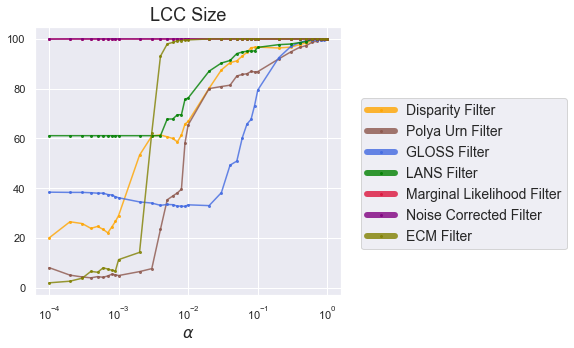

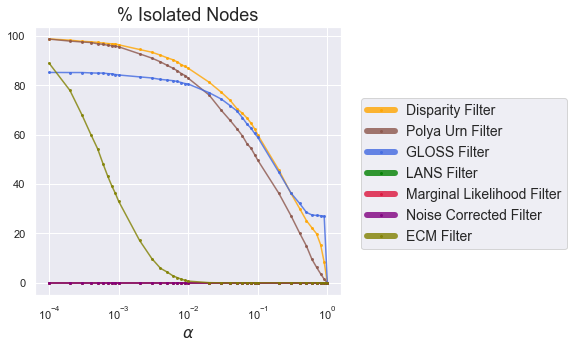

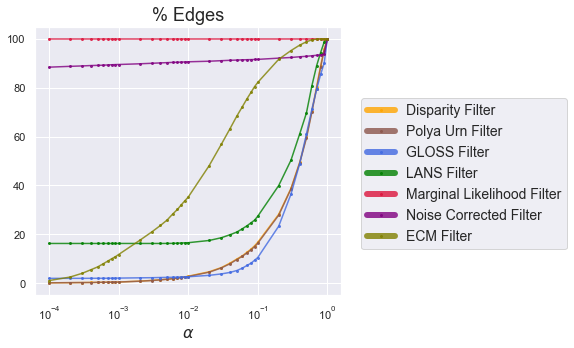

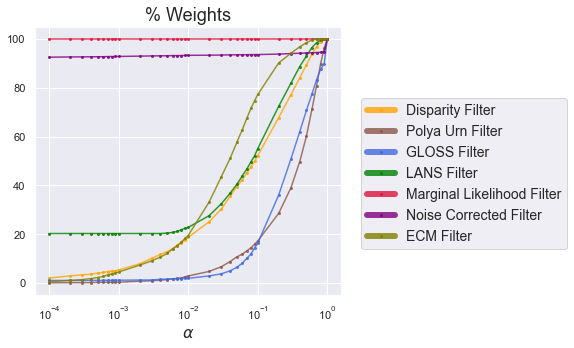

In [32]:
sns.set_theme()
for i, property in enumerate(properties):
    fig  = plt.figure(figsize=(5,5))
    for name in names:
        backbone_res = analysis_dict[name].T
        plt.plot(backbone_res[property].index, backbone_res[property], label=labels[name], color=colors[name], alpha=0.8, marker='o', markersize=2)

    #plt.axvline(x = 10**-2, color = 'k', linestyle='--')
    
    plt.title(property, fontsize=18)
    #lg = fig.legend(bbox_to_anchor=(0.5, -0.05), fontsize=25, ncol=8)
    lg = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
 
    plt.xlabel(r'$\alpha$',fontsize=16)
    #plt.loglog()
    plt.xscale('log')
    for line in lg.get_lines():
        line.set_linewidth(6)

    plt.tight_layout()
    #fig.savefig(figures_path + property + '.png', bbox_inches='tight', dpi=300)
    #plt.close(fig)



In [15]:
(10**-2)

0.01

In [31]:
backbone_res

,LCC Size,% Isolated Nodes,% Edges,% Weights
0.0001,1.986755,88.953914,1.044104,0.577536
0.0002,2.644628,77.871251,2.478248,1.027864
0.0003,3.859251,67.776152,4.020402,1.398168
0.0004,6.587374,60.021946,5.484548,1.792594
0.0005,6.235012,54.242868,6.636664,2.242326
0.0006,8.028169,48.061448,7.908791,2.715738
0.0007,7.51928,43.087052,9.030903,3.262245
0.0008,7.039711,39.209949,10.021002,3.723717
0.0009,6.762178,36.174104,10.825083,4.083847
0.0010,11.311475,33.065106,11.707171,4.481297


In [2]:
g = nx.Graph()

g.add_edge(1,2,weight=1)

g.add_edge(1,3,weight=3)
g.add_edge(1,4,weight=4)
g.add_edge(1,5,weight=3)
g.add_edge(5,10,weight=1)
g.add_edge(5,11,weight=1)
g.add_edge(5,12,weight=1)

g.add_edge(6,2,weight=2)
g.add_edge(7,2,weight=3)
g.add_edge(8,2,weight=9)
g.add_edge(9,2,weight=5)

In [4]:
from Backbones.disparity_filter import disparity_filter
b = disparity_filter(g)

In [20]:
b = nx.edge_betweenness(g, weight='weight', normalized=False)

In [21]:
for edge in b:
    b[edge] = b[edge]/ len(g)

In [22]:
b

{(1, 2): 2.2222222222222223,
 (1, 3): 0.8888888888888888,
 (1, 4): 0.8888888888888888,
 (1, 5): 0.8888888888888888,
 (2, 6): 0.8888888888888888,
 (2, 7): 0.8888888888888888,
 (2, 8): 0.8888888888888888,
 (2, 9): 0.8888888888888888}

In [23]:
from Backbones.h_backbone import h_backbone

In [24]:
h_backbone(g)

(1, 4, <networkx.classes.graph.Graph at 0x7f842acb5550>)

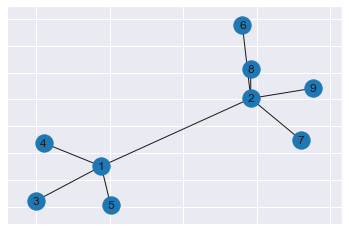

In [25]:
nx.draw_networkx(h_backbone(g)[2])

In [26]:
s, br, G = h_backbone(g)

In [27]:
print(s, br)

1 4


In [28]:
nx.to_pandas_edgelist(G).sort_values(by='h_backbone')

,source,target,weight,h_backbone,h_bridge
1,1,3,3,False,0.889
4,2,6,2,False,0.889
5,2,7,3,False,0.889
0,1,2,1,True,2.222
2,1,4,4,True,0.889
3,1,5,6,True,0.889
6,2,8,9,True,0.889
7,2,9,5,True,0.889
